<a href="https://colab.research.google.com/github/yesung05/25-BDA-TeamDP/blob/main/25_BDA_BikeCrash_TeamDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자전거 사고 다발구간에서의 자전거 사고 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install koreanize_matplotlib

In [3]:
import koreanize_matplotlib

In [4]:
%config InlineBackend.figure_format = 'retina'

In [5]:
rData = pd.read_csv('bike_data.csv', encoding = 'cp949') #rawData
rData.head(3)

,다발지구분,다발지시군구,지점명,발생일,발생시간대,사고내용,가해자성별,가해자연령,가해자차종,가해자신체상해정도,피해자성별,피해자연령,피해자차종,피해자신체상해정도,사고유형,법규위반사항,기상상태,사망자수,부상자수
0,2018년 다발지,서울특별시 종로구1,서울특별시 종로구 종로6가(흥인지문사거리 부근),2018-03-23,07시,경상,남,59세,자전거,상해없음,남,40세,보행자,경상,차대사람 - 횡단중,신호위반,맑음,0,5
1,2018년 다발지,서울특별시 종로구1,서울특별시 종로구 종로6가(흥인지문사거리 부근),2018-03-25,17시,부상신고,남,57세,자전거,부상신고,남,75세,승용차,상해없음,차대차 - 측면충돌,신호위반,맑음,0,5
2,2018년 다발지,서울특별시 종로구1,서울특별시 종로구 종로6가(흥인지문사거리 부근),2018-06-23,14시,중상,남,78세,자전거,중상,남,63세,승용차,상해없음,차대차 - 측면충돌,신호위반,맑음,0,5


In [6]:
rData.shape

(4916, 19)

In [7]:
rData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   다발지구분      4916 non-null   object
 1   다발지시군구     4916 non-null   object
 2   지점명        4916 non-null   object
 3   발생일        4916 non-null   object
 4   발생시간대      4916 non-null   object
 5   사고내용       4916 non-null   object
 6   가해자성별      4916 non-null   object
 7   가해자연령      4916 non-null   object
 8   가해자차종      4916 non-null   object
 9   가해자신체상해정도  4916 non-null   object
 10  피해자성별      4916 non-null   object
 11  피해자연령      4916 non-null   object
 12  피해자차종      4916 non-null   object
 13  피해자신체상해정도  4916 non-null   object
 14  사고유형       4916 non-null   object
 15  법규위반사항     4916 non-null   object
 16  기상상태       4916 non-null   object
 17  사망자수       4916 non-null   int64 
 18  부상자수       4916 non-null   int64 
dtypes: int64(2), object(17)
memory usage: 729.8+ KB


In [8]:
rData.describe()

,사망자수,부상자수
count,4916.000000,4916.000000
mean,0.068755,5.747356
std,0.259415,1.952238
min,0.000000,2.000000
25%,0.000000,4.000000
50%,0.000000,5.000000
75%,0.000000,7.000000
max,2.000000,16.000000


In [9]:
rData.describe(include = 'object')

,다발지구분,다발지시군구,지점명,발생일,발생시간대,사고내용,가해자성별,가해자연령,가해자차종,가해자신체상해정도,피해자성별,피해자연령,피해자차종,피해자신체상해정도,사고유형,법규위반사항,기상상태
count,4916,4916,4916,4916,4916,4916,4916,4916,4916,4916,4916,4916,4916,4916,4916,4916,4916
unique,3,461,930,1056,24,4,3,90,13,6,4,96,13,7,13,7,5
top,2019년 다발지,서울특별시 영등포구1,경기도 성남시 중원구 성남동(모란사거리 부근),2020-10-29,17시,경상,남,불명,자전거,상해없음,남,59세,자전거,경상,차대차 - 측면충돌,안전운전 의무 불이행,맑음
freq,1727,30,22,16,380,2631,3602,148,2201,3007,3365,136,3035,1918,2491,3169,4635


In [10]:
df = pd.DataFrame()

In [11]:
df['Year'] = rData['발생일'].str.split("-").str[0].astype(int)
df['Month'] = rData['발생일'].str.split("-").str[1].astype(int)
df['Date'] = rData['발생일'].str.split("-").str[2].astype(int)
df['Time'] = rData['발생시간대'].str.replace("시", "").astype(int)
df['Place'] = rData['지점명']
df['accidentType'] = rData['사고유형']
df['accidentDetail'] = rData['사고내용']
df['weather'] = rData['기상상태']
df['dead'] = rData['사망자수']
df['hert'] = rData['부상자수']

In [67]:
tempPrepAge = rData['가해자연령'].copy()
tempPrepAge = tempPrepAge.replace("불명", None)
tempPrepAge = tempPrepAge.str.replace("세", "")


df['prepAge'] = pd.to_numeric(tempPrepAge)
df['prepGender'] = rData['가해자성별']
df['prepVehicle'] = rData['가해자차종']
df['prepDamege'] = rData['가해자신체상해정도']



In [13]:
tempVictemAge = rData['피해자연령'].copy()
tempVictemAge = tempVictemAge.replace("불명", None)
tempVictemAge = tempVictemAge.replace("없음", None)
tempVictemAge = tempVictemAge.str.replace("세", "")

df['victemAge'] = pd.to_numeric(tempVictemAge)
df['victemGender'] = rData['피해자성별']
df['victemVehicle'] = rData['피해자차종']
df['victemDamege'] = rData['피해자신체상해정도']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            4916 non-null   int64  
 1   Month           4916 non-null   int64  
 2   Date            4916 non-null   int64  
 3   Time            4916 non-null   int64  
 4   Place           4916 non-null   object 
 5   accidentType    4916 non-null   object 
 6   accidentDetail  4916 non-null   object 
 7   weather         4916 non-null   object 
 8   dead            4916 non-null   int64  
 9   hert            4916 non-null   int64  
 10  prepAge         4768 non-null   float64
 11  prepGender      4916 non-null   object 
 12  prepVehicle     4916 non-null   object 
 13  prepDamege      4916 non-null   object 
 14  victemAge       4838 non-null   float64
 15  victemGender    4916 non-null   object 
 16  victemVehicle   4916 non-null   object 
 17  victemDamege    4916 non-null   o

In [15]:
df['accidentType'].describe()

,accidentType
count,4916
unique,13
top,차대차 - 측면충돌
freq,2491


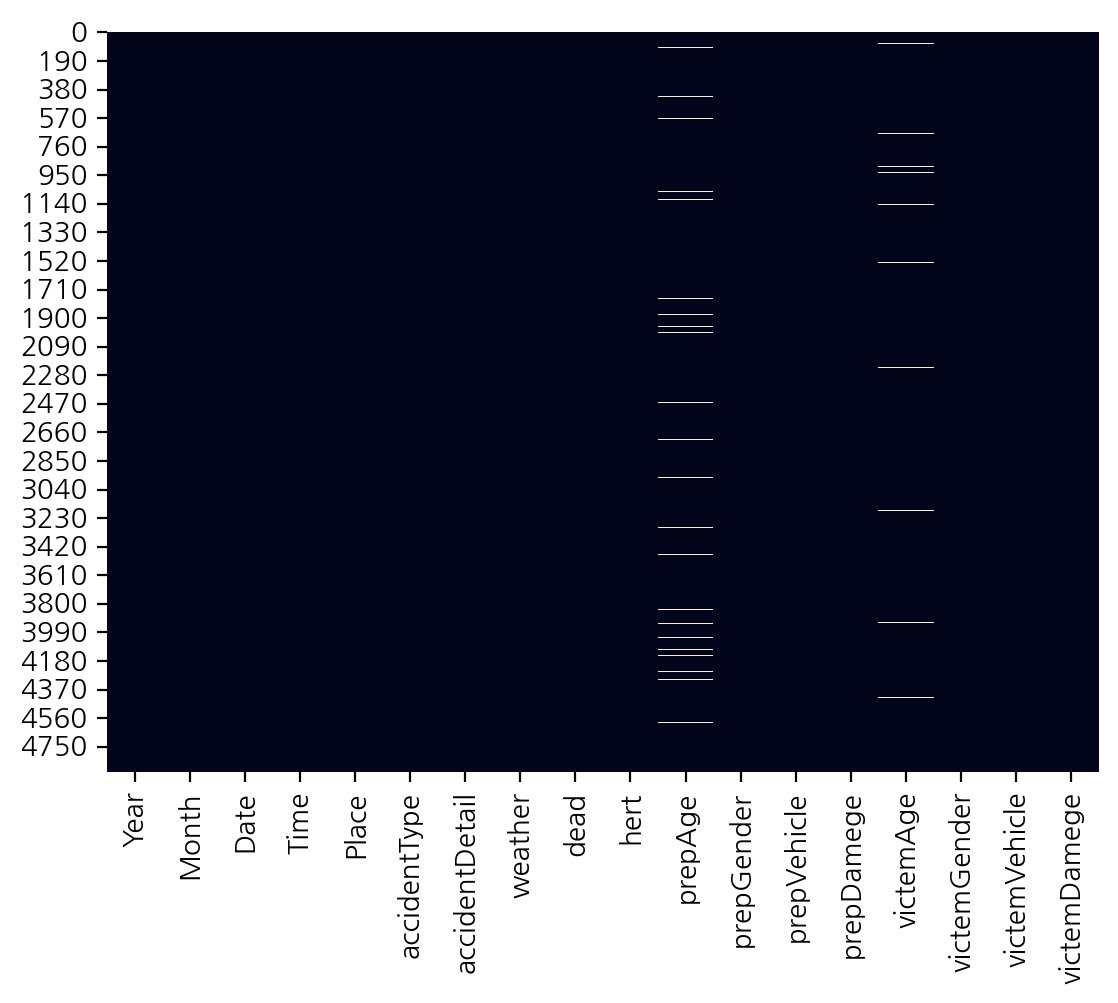

In [51]:
sns.heatmap(df.isnull(), cbar = False)
plt.show()

In [17]:
df.accidentType.isna().sum()

np.int64(0)

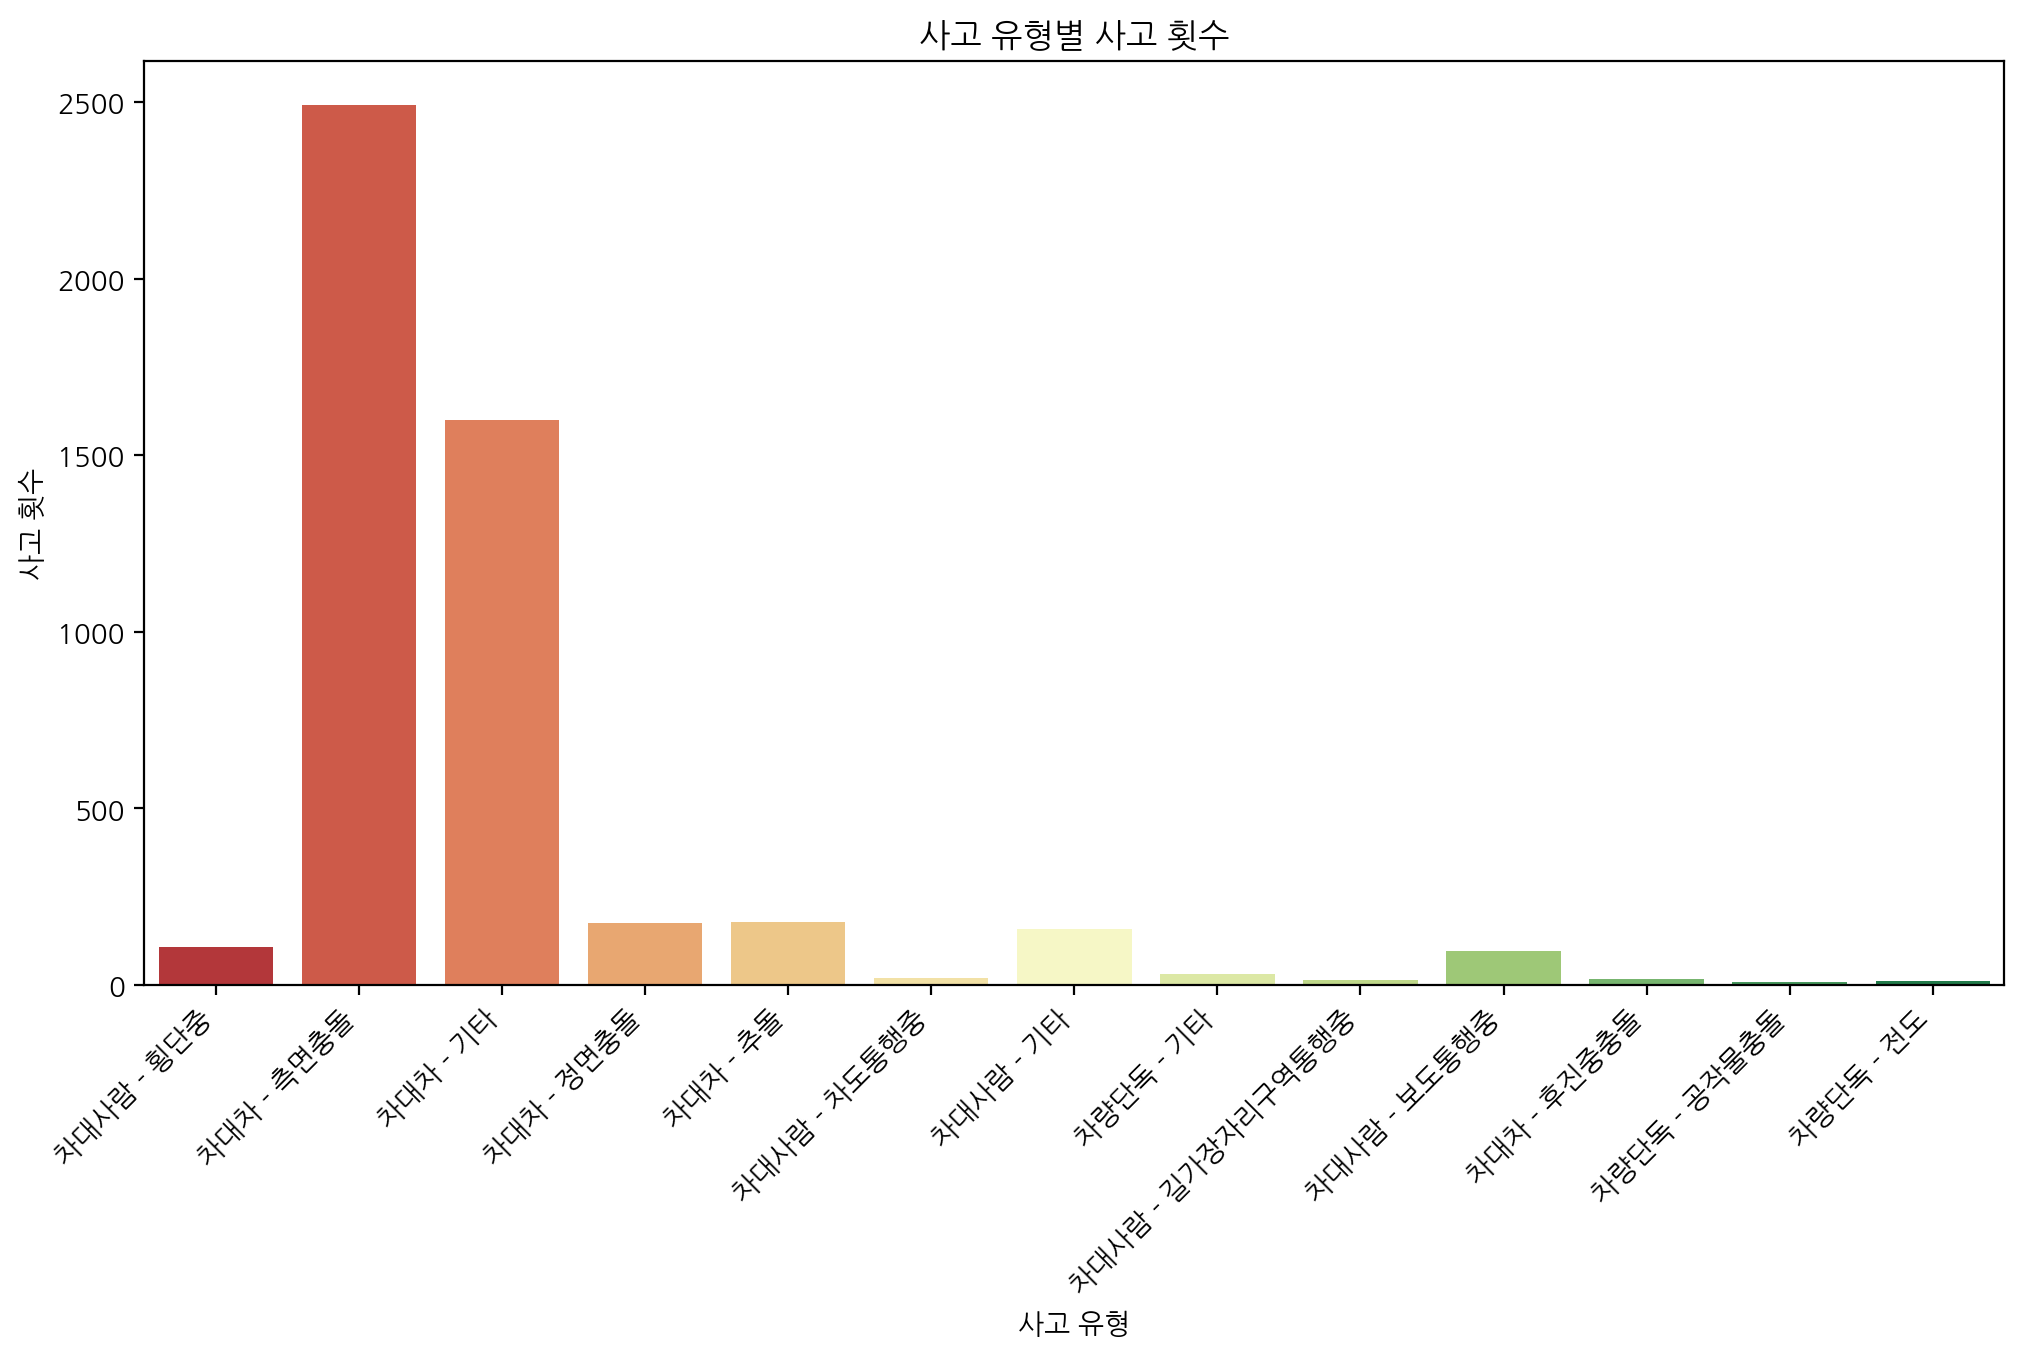

In [158]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'accidentType', hue='accidentType', palette = 'RdYlGn')
# Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.
plt.xlabel("사고 유형")
plt.ylabel("사고 횟수")
plt.title("사고 유형별 사고 횟수")
plt.xticks(rotation = 45, ha='right')
plt.show()

## 5월, 10월등 선선한 날씨에 자전거 이용이 많아져서 이에 따라 사고가 늘어나는 듯 보임


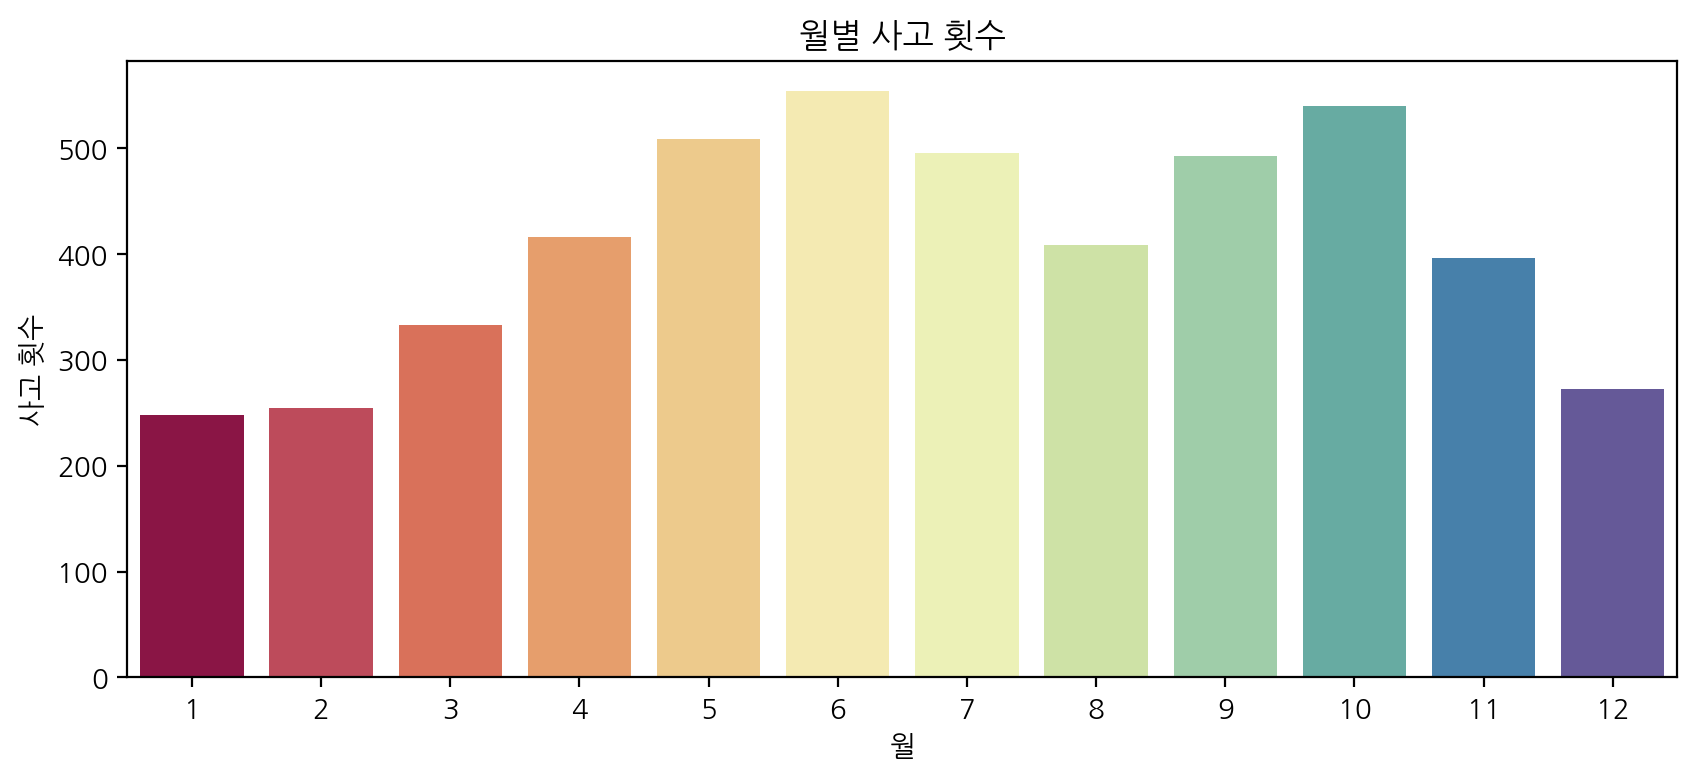

In [166]:
plt.figure(figsize=(10,4))
sns.countplot(df, x='Month', hue='Month', palette = 'Spectral', legend = False)
plt.xlabel("월")
plt.ylabel("사고 횟수")
plt.title("월별 사고 횟수")
plt.show()

## 출퇴근 시간대 자전거 탑승 많음

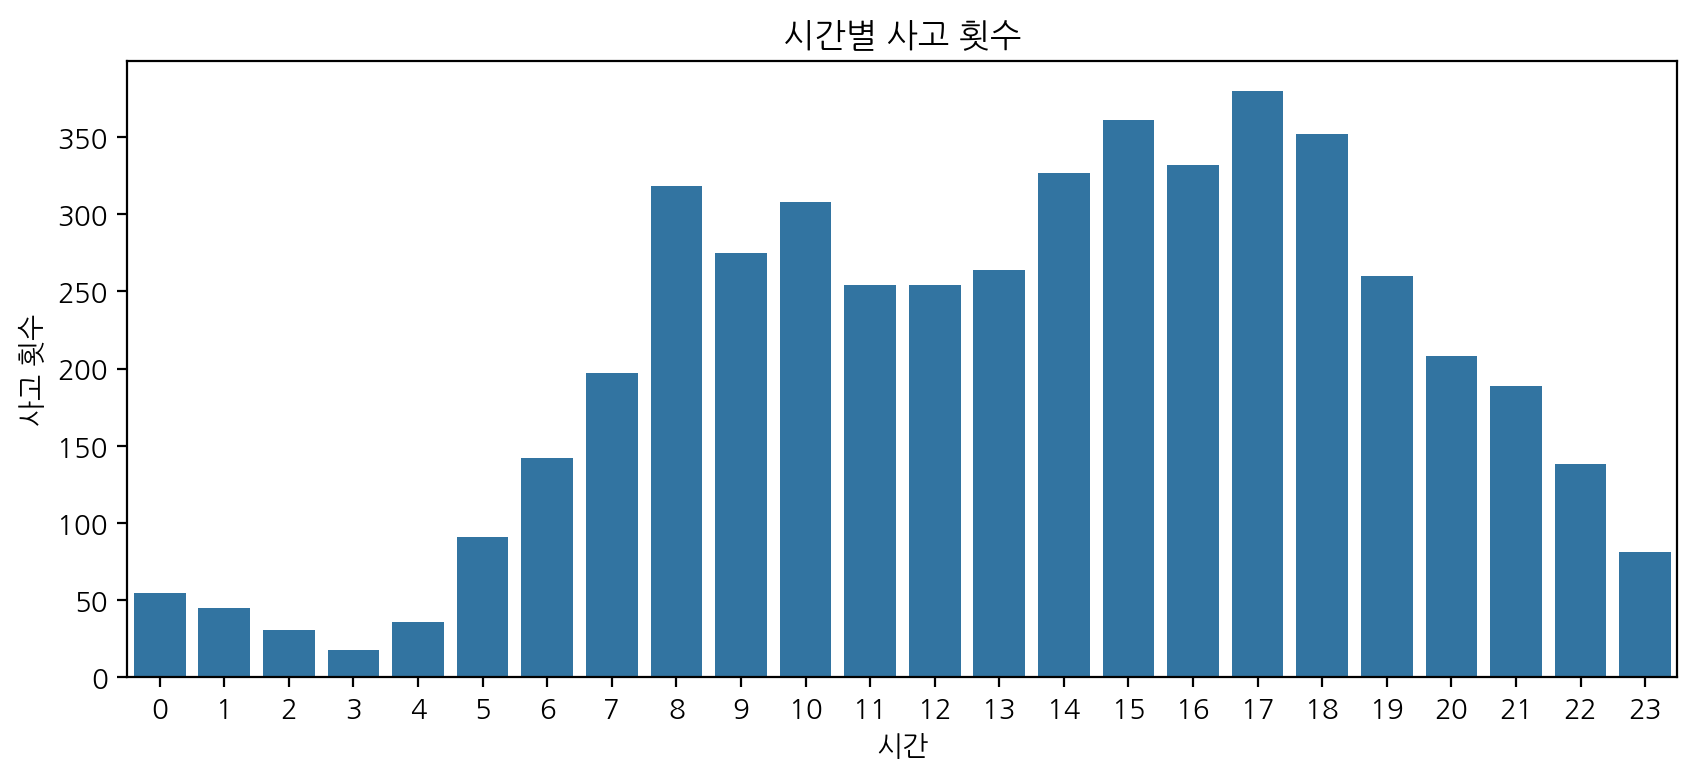

In [20]:
plt.figure(figsize = (10, 4))
sns.countplot(df, x = 'Time')
plt.xlabel("시간")
plt.ylabel("사고 횟수")
plt.title("시간별 사고 횟수")
plt.show()

In [113]:
df = df.assign(totalCasualty = df['dead'] + df['hert'])
groupCasualty = df.groupby('accidentType')[['hert', 'dead']].sum().reset_index()
groupCasualty

,accidentType,hert,dead
0,차대사람 - 기타,960,7
1,차대사람 - 길가장자리구역통행중,106,1
2,차대사람 - 보도통행중,551,9
3,차대사람 - 차도통행중,103,3
4,차대사람 - 횡단중,635,5
5,차대차 - 기타,8981,112
6,차대차 - 정면충돌,1019,12
7,차대차 - 추돌,1085,15
8,차대차 - 측면충돌,14408,168
9,차대차 - 후진중충돌,91,1


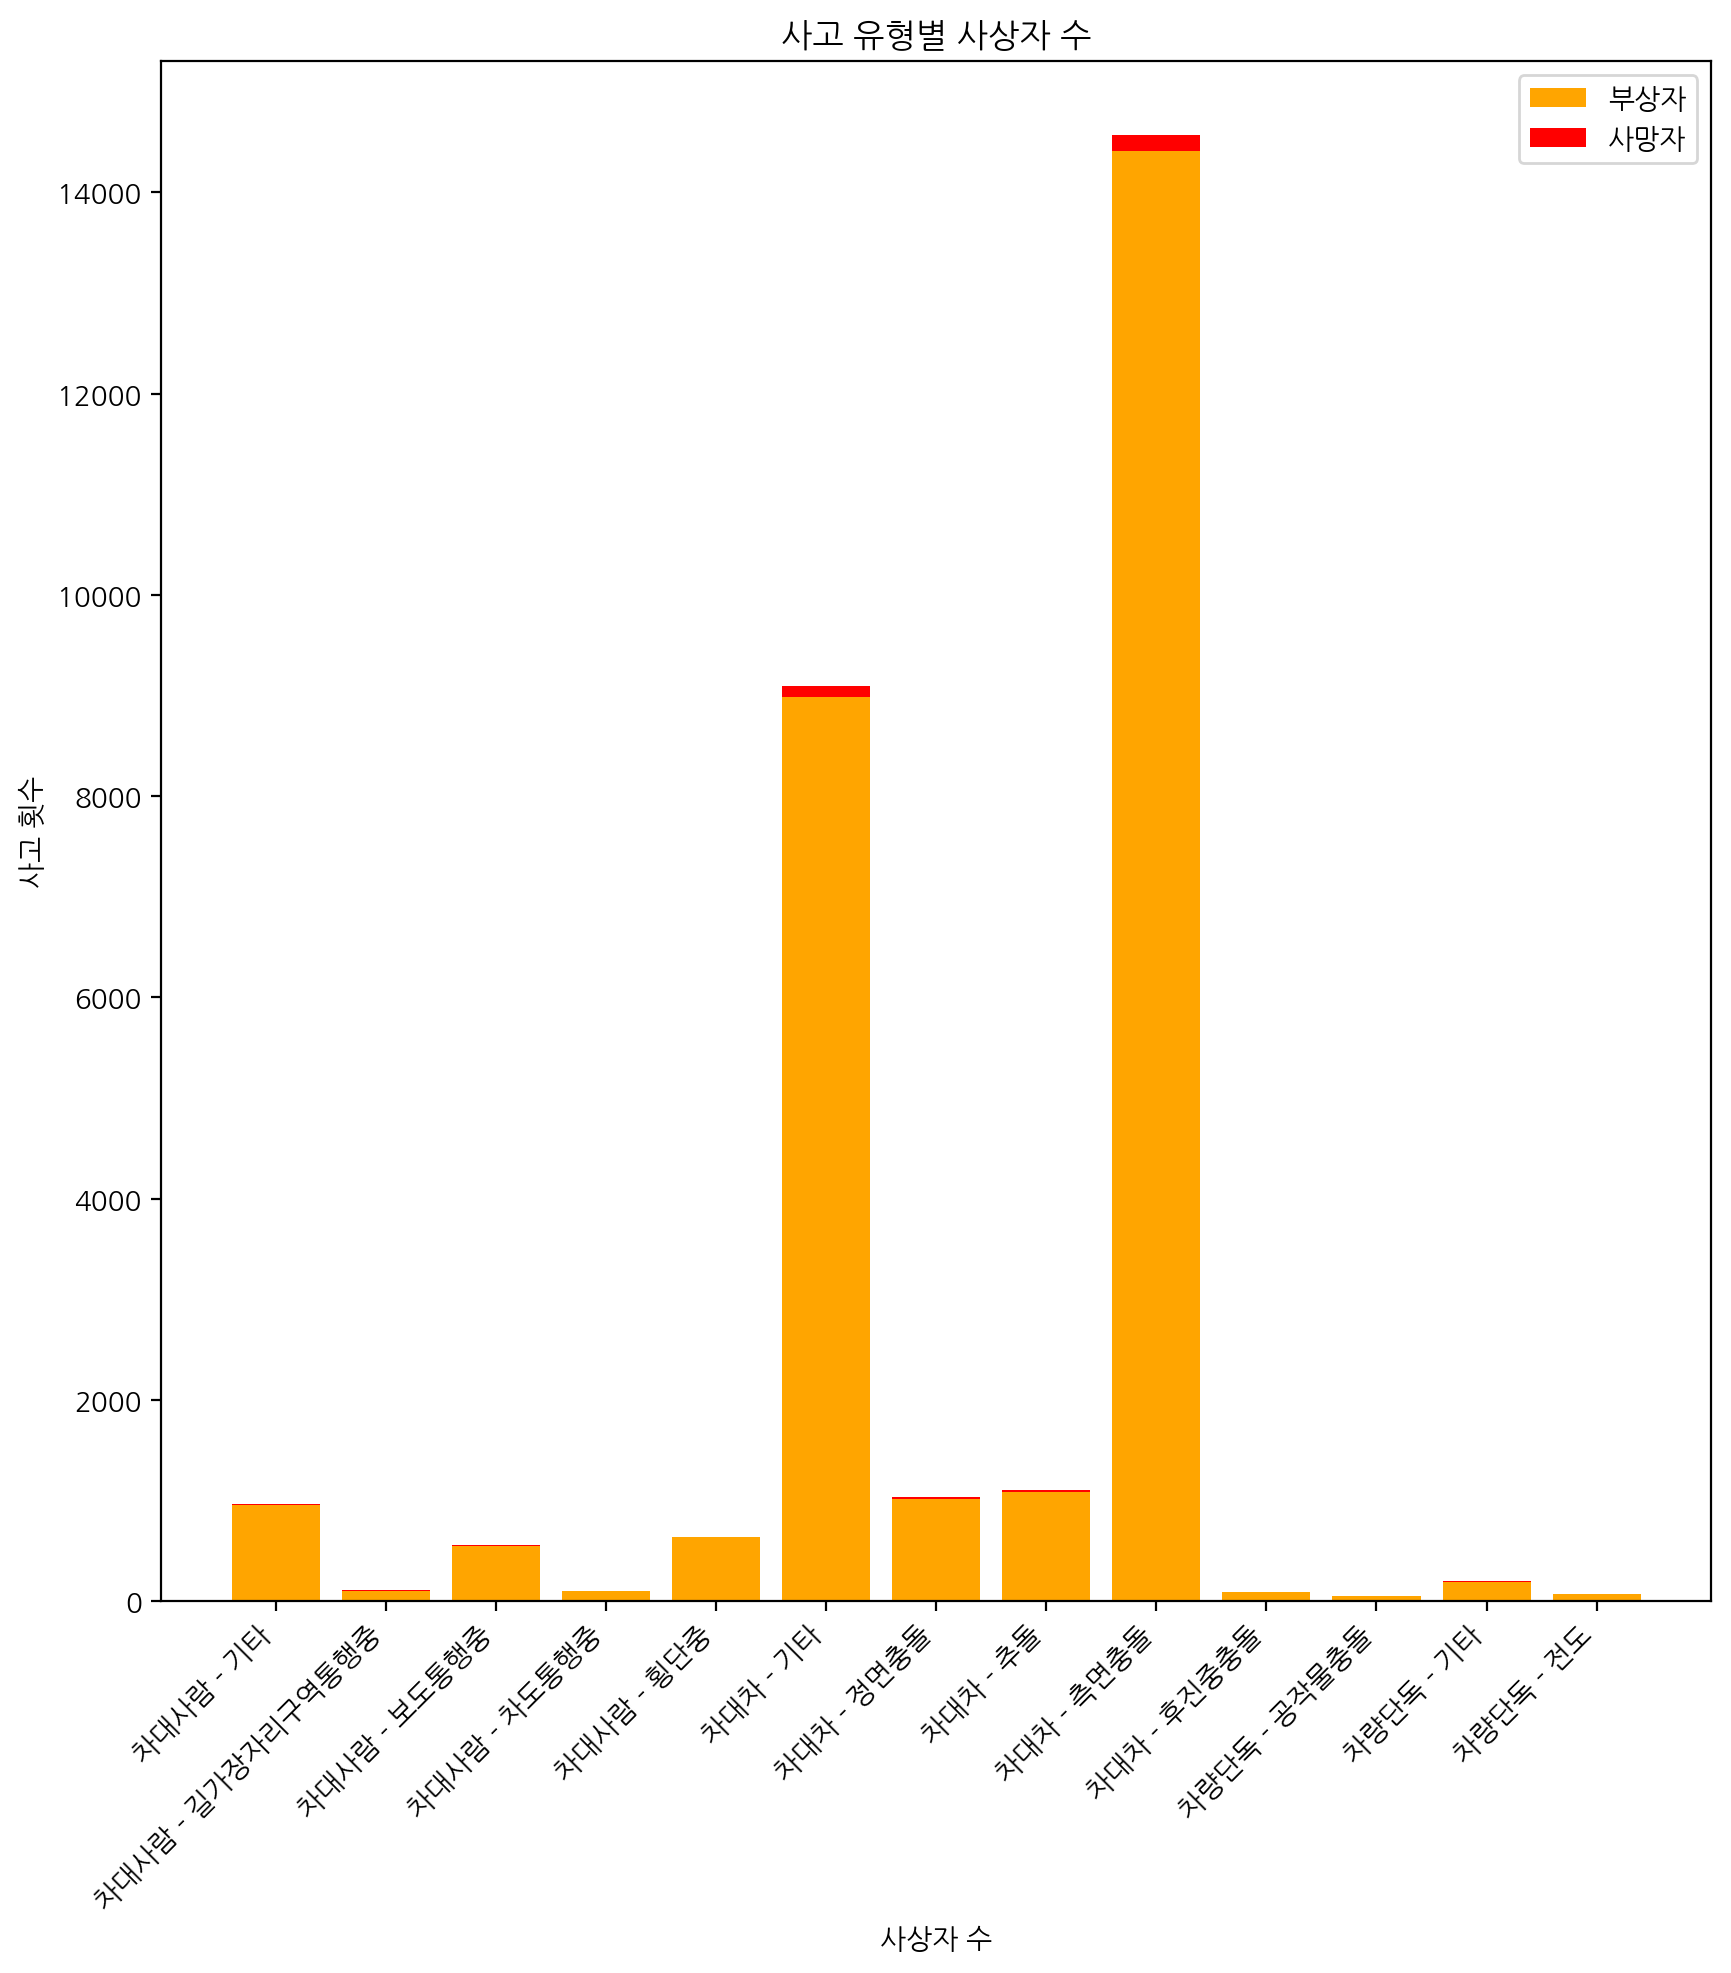

In [123]:
plt.figure(figsize = (10,10))
plt.bar(groupCasualty['accidentType'], groupCasualty['hert'], color = 'orange', label = '부상자')
plt.bar(groupCasualty['accidentType'], groupCasualty['dead'], bottom=groupCasualty['hert'], color = 'red', label = '사망자')
# sns.barplot(data = accident_total, x = 'accidentType', y = 'total', hue='')
plt.xticks(rotation = 45, ha='right')
plt.legend()
plt.xlabel("사상자 수")
plt.ylabel("사고 횟수")
plt.title("사고 유형별 사상자 수")
plt.show()

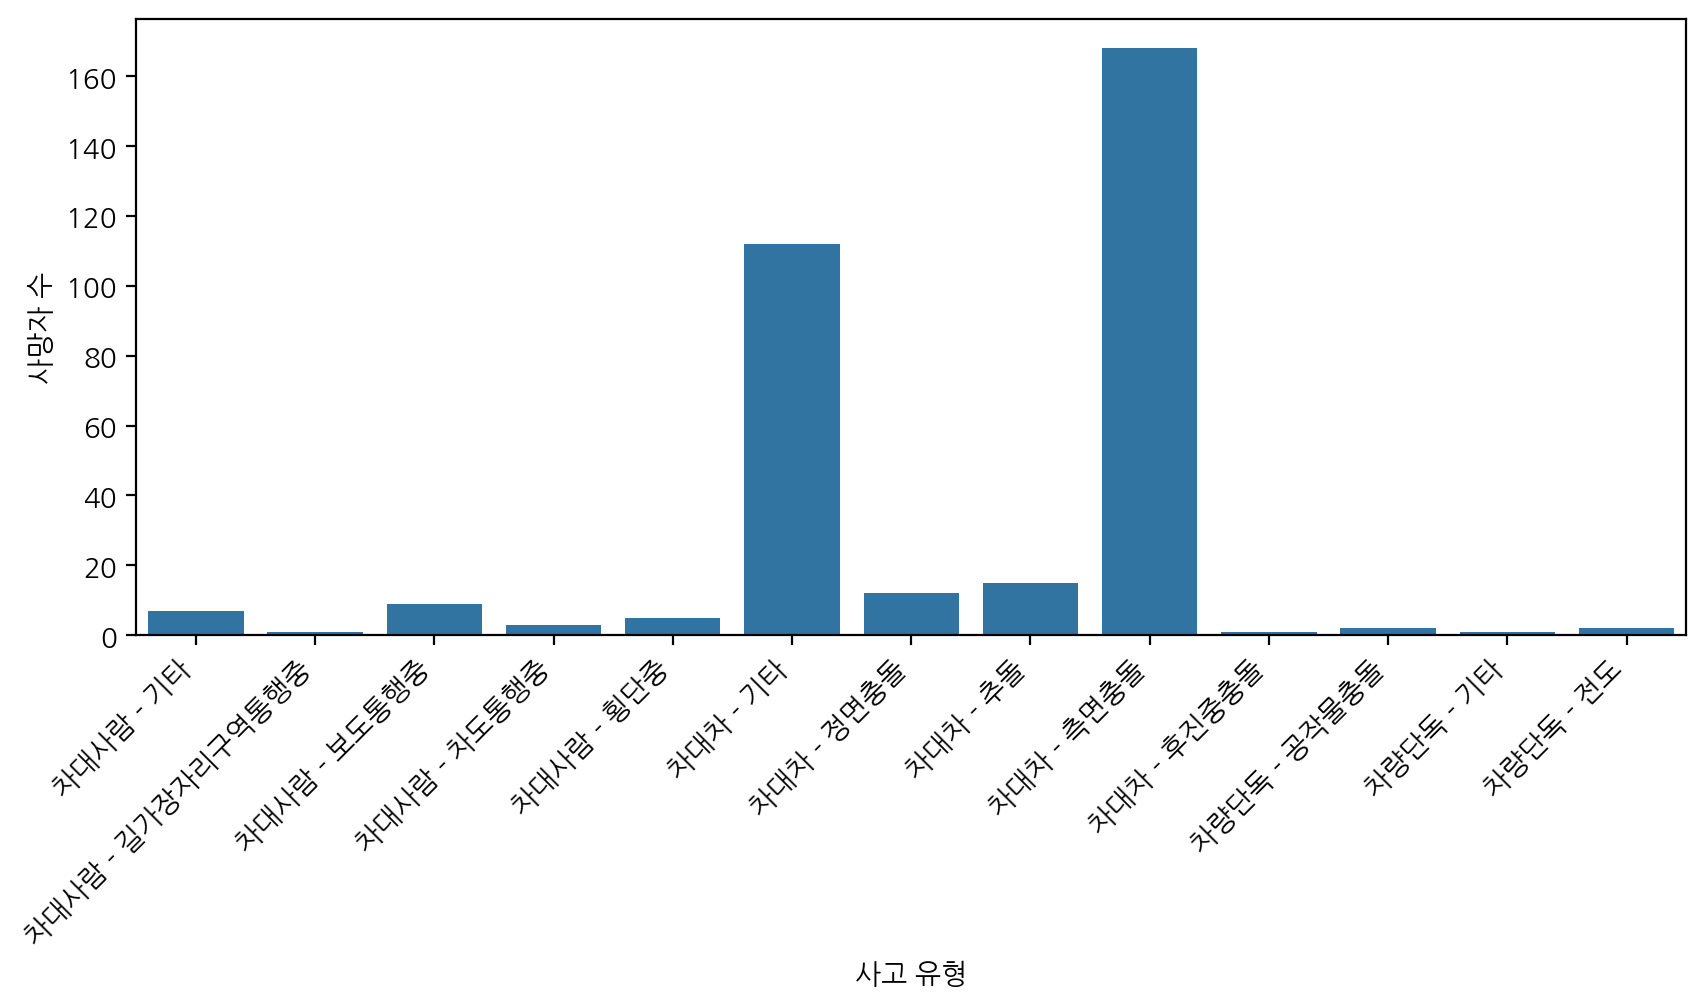

In [121]:
plt.figure(figsize = (10,4))
sns.barplot(data = groupCasualty, x = 'accidentType', y = 'dead', cmap='')
plt.xticks(rotation = 45, ha='right')
plt.xlabel("사고 유형")
plt.ylabel("사망자 수")
plt.show()

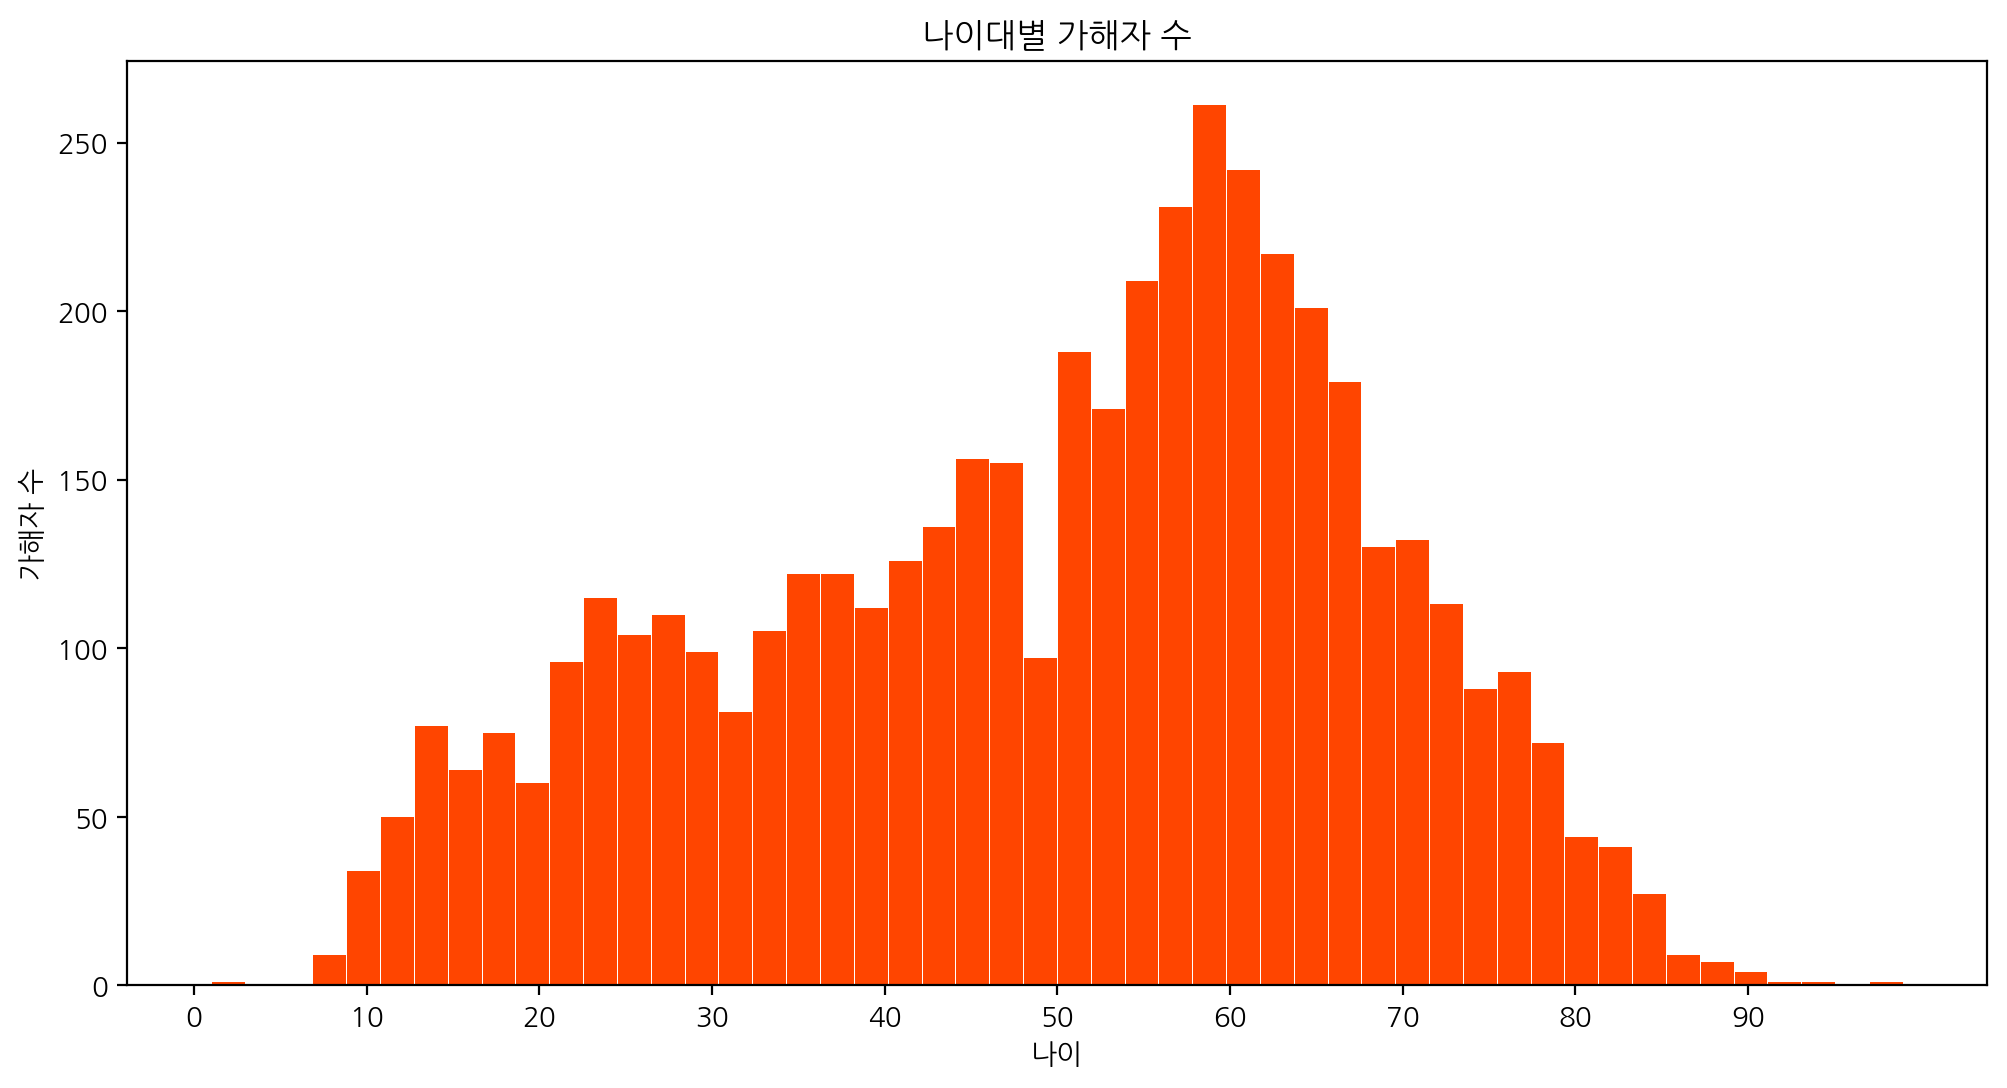

In [128]:
plt.figure(figsize = (12, 6))
plt.hist(df['prepAge'], bins = 50, rwidth = .97, color = 'orangered')
plt.xlabel("나이")
plt.ylabel("가해자 수")
plt.xticks(np.arange(0,100,10))
plt.title("나이대별 가해자 수")
plt.show()

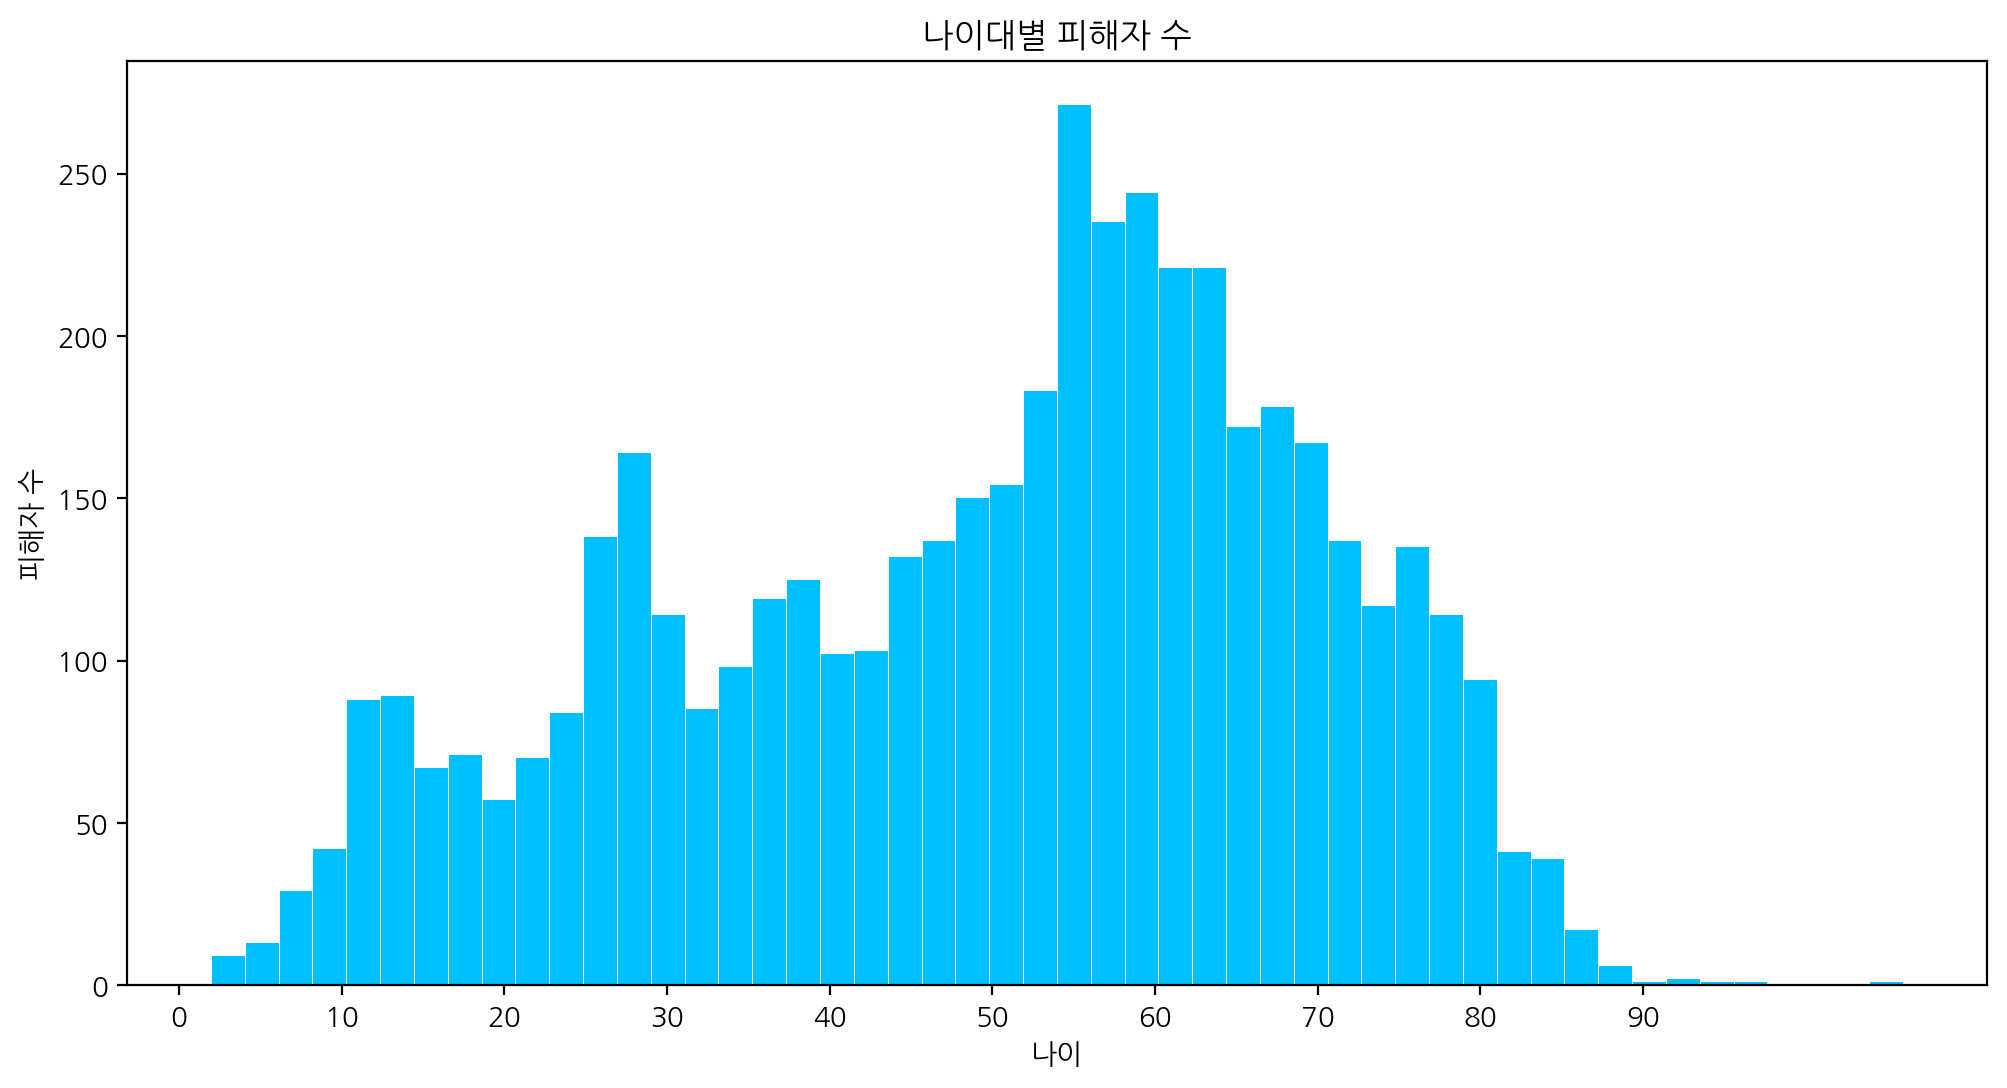

In [127]:
plt.figure(figsize = (12, 6))
plt.hist(df['victemAge'], bins = 50, rwidth = .97, color = 'deepskyblue')
plt.xlabel("나이")
plt.ylabel("피해자 수")
plt.xticks(np.arange(0,100,10))
plt.title("나이대별 피해자 수")
plt.show()

In [154]:
df['prepGender'] = df['prepGender'].replace('기타불명', None)
df['victemGender'] = df['victemGender'].replace('기타불명', None)

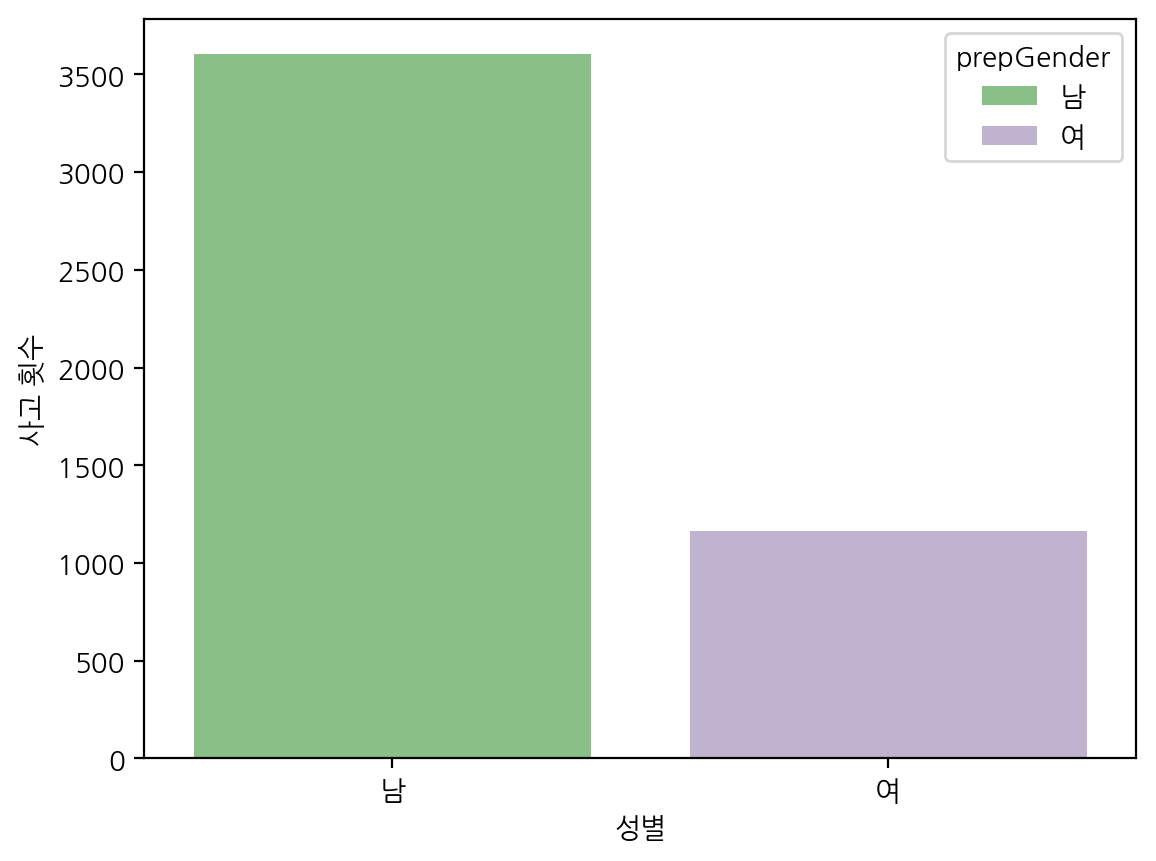

In [155]:
sns.countplot(data=df, x='prepGender', hue='prepGender', palette='Accent')
plt.xlabel("성별")
plt.ylabel("사고 횟수")
plt.show()